# Preprocessing

In [203]:
import pandas as pd

from src.support_encoding import *
from src.support_pre import *
from src.support_plots import * 

In [204]:
df = pd.read_csv("datos/clean_data.csv", index_col = 0)
df.drop(columns=["municipality", "numPhotos"], inplace=True)
df.drop(index = df[df["province"] == "Segovia"].index, inplace=True)
df.reset_index(inplace=True, drop=True)
df.head()

,price,propertyType,size,exterior,rooms,bathrooms,province,showAddress,distance,hasVideo,status,newDevelopment,hasPlan,has3DTour,has360,floor,hasLift,hasParkingSpace,isParkingSpaceIncludedInPrice
0,550.0,chalet,371.0,False,6,3,Toledo,False,40116,False,good,False,False,False,False,unknown,unknown,unknown,unknown
1,750.0,flat,60.0,True,1,1,Madrid,True,7037,False,good,False,False,False,False,3,True,unknown,unknown
2,750.0,flat,70.0,True,2,1,Madrid,False,16145,True,good,False,True,False,False,bj,False,unknown,unknown
3,400.0,penthouse,67.0,True,2,2,Madrid,False,55041,False,good,False,False,False,True,2,False,unknown,unknown
4,450.0,flat,89.0,False,2,1,Toledo,False,47186,False,good,False,False,False,False,2,True,True,True


In [205]:
df[df.select_dtypes("bool").columns] = df.select_dtypes("bool").astype("str")

In [206]:
df[["rooms", "bathrooms"]] = df[["rooms", "bathrooms"]].astype("str")

In [207]:
num_cols = df.select_dtypes("number").columns
cat_cols = df.select_dtypes("O").columns

df[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     434 non-null    float64
 1   size      434 non-null    float64
 2   distance  434 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 10.3 KB


In [208]:
df[cat_cols].head()

,propertyType,exterior,rooms,bathrooms,province,showAddress,hasVideo,status,newDevelopment,hasPlan,has3DTour,has360,floor,hasLift,hasParkingSpace,isParkingSpaceIncludedInPrice
0,chalet,False,6,3,Toledo,False,False,good,False,False,False,False,unknown,unknown,unknown,unknown
1,flat,True,1,1,Madrid,True,False,good,False,False,False,False,3,True,unknown,unknown
2,flat,True,2,1,Madrid,False,True,good,False,True,False,False,bj,False,unknown,unknown
3,penthouse,True,2,2,Madrid,False,False,good,False,False,False,True,2,False,unknown,unknown
4,flat,False,2,1,Toledo,False,False,good,False,False,False,False,2,True,True,True


plot_cats(data = df, columns = cat_cols, rv = "price", plot_size=(20,20))

In [209]:
# asunciones = Asunciones(dataframe=df, columna_numerica="price")


# for categoria in cat_cols:   

#     print(f"Estamos analizando la variable {categoria.upper()}")
    
#     asunciones.identificar_normalidad(metodo = "shapiro") 

#     # comprobamos la homogeneidad de varianzas
#     asunciones.identificar_homogeneidad(columna_categorica = categoria)

#     # instanciamos la clase para evaluar si hay diferencias entre los distintos grupos de las variables categóricas
#     test = TestEstadisticos(df, "price", categoria)
#     test.run_all_tests()
#     print("\n###########################\n")

In [210]:
cat_cols_ordinal = ["has360", "province", "propertyType", "bathrooms"]
cat_cols_nominal = cat_cols.drop(cat_cols_ordinal)

#### Encoding

In [211]:
onehot_df, oh_encoder = encode_onehot(df, cat_cols_nominal)

In [212]:
df_w_target, target_encoder = encode_target(df, cat_cols_ordinal, "price")

In [213]:
df_encoded = pd.concat([df_w_target.drop(columns = cat_cols_nominal), onehot_df], axis = 1)
df_encoded.head()

,price,propertyType,size,bathrooms,province,distance,has360,exterior_False,exterior_True,rooms_0,...,floor_st,floor_unknown,hasLift_False,hasLift_True,hasLift_unknown,hasParkingSpace_True,hasParkingSpace_unknown,isParkingSpaceIncludedInPrice_False,isParkingSpaceIncludedInPrice_True,isParkingSpaceIncludedInPrice_unknown
0,550.0,674.434141,371.0,679.027033,579.743213,40116,671.176292,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,750.0,677.423977,60.0,680.495726,692.932011,7037,671.176292,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,750.0,677.423977,70.0,680.495726,692.932011,16145,671.176292,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,400.0,651.137922,67.0,653.853023,692.932011,55041,699.901503,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,450.0,677.423977,89.0,680.495726,579.743213,47186,671.176292,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


#### Feature Scaling

In [214]:
df_scaled, scaler = scale_data(data = df_encoded, columns = df_encoded.columns.drop("price"))
df_scaled = pd.concat([df_encoded["price"],df_scaled], axis = 1)

In [215]:
df_scaled.head()

,price,propertyType,size,bathrooms,province,distance,has360,exterior_False,exterior_True,rooms_0,...,floor_st,floor_unknown,hasLift_False,hasLift_True,hasLift_unknown,hasParkingSpace_True,hasParkingSpace_unknown,isParkingSpaceIncludedInPrice_False,isParkingSpaceIncludedInPrice_True,isParkingSpaceIncludedInPrice_unknown
0,550.0,-2.989836,9.088235,-1.468693,-113.188799,0.760368,0.000000,1.0,-1.0,0.0,...,0.0,1.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,750.0,0.000000,-0.058824,0.000000,0.000000,-0.467498,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,750.0,0.000000,0.235294,0.000000,0.000000,-0.129416,0.000000,0.0,0.0,0.0,...,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,400.0,-26.286055,0.147059,-26.642703,0.000000,1.314372,28.725211,0.0,0.0,0.0,...,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,450.0,0.000000,0.794118,0.000000,-113.188799,1.022800,0.000000,1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,1.0,-1.0


#### Outliers

<Axes: xlabel='price'>

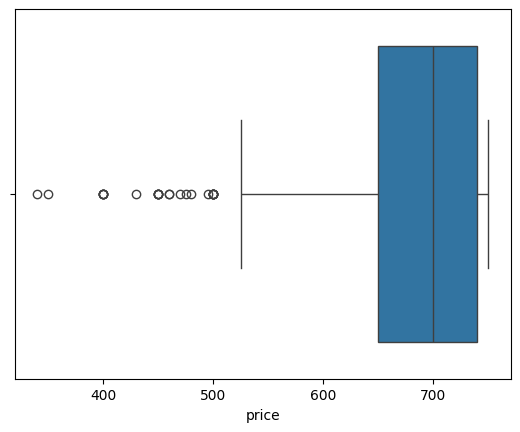

In [216]:
sns.boxplot(df_scaled, x= 'price')

In [217]:
df_outliers, outlier_finder = find_outliers(data = df_encoded, columns=df_encoded.columns, method = "ifo", threshold=60)
df_outliers

,price,propertyType,size,bathrooms,province,distance,has360,exterior_False,exterior_True,rooms_0,...,floor_unknown,hasLift_False,hasLift_True,hasLift_unknown,hasParkingSpace_True,hasParkingSpace_unknown,isParkingSpaceIncludedInPrice_False,isParkingSpaceIncludedInPrice_True,isParkingSpaceIncludedInPrice_unknown,outlier
0,550.0,674.434141,371.0,679.027033,579.743213,40116,671.176292,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-1
7,684.0,688.838807,45.0,680.495726,692.932011,10656,662.595666,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-1
12,700.0,688.838807,28.0,680.495726,692.932011,5569,671.176292,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1
36,750.0,677.423977,95.0,653.853023,579.743213,34444,662.595666,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-1
65,700.0,677.423977,50.0,653.853023,692.932011,32052,662.595666,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-1
66,750.0,672.352667,35.0,680.495726,692.932011,4047,662.595666,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-1
69,720.0,677.423977,133.0,653.853023,692.932011,19453,699.901503,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-1
109,500.0,672.352667,96.0,653.853023,579.743213,35256,699.901503,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1
122,750.0,688.838807,55.0,680.495726,692.932011,918,671.176292,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-1
124,624.0,677.423977,45.0,680.495726,692.932011,24077,671.176292,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-1


In [218]:
df_encoded.loc[df_outliers.index, num_cols.drop('price')] = np.nan

In [219]:
df_out_imputed, outlier_imputer = impute_nulls(data=df_encoded)

[IterativeImputer] Completing matrix with shape (434, 55)
[IterativeImputer] Ending imputation round 1/10, elapsed time 5.82
[IterativeImputer] Change: 30459.16657754011, scaled tolerance: 59.351 
[IterativeImputer] Ending imputation round 2/10, elapsed time 10.48
[IterativeImputer] Change: 11786.21, scaled tolerance: 59.351 
[IterativeImputer] Ending imputation round 3/10, elapsed time 14.92
[IterativeImputer] Change: 3824.5699999999993, scaled tolerance: 59.351 
[IterativeImputer] Ending imputation round 4/10, elapsed time 19.32
[IterativeImputer] Change: 5330.195, scaled tolerance: 59.351 
[IterativeImputer] Ending imputation round 5/10, elapsed time 24.05
[IterativeImputer] Change: 5300.260000000003, scaled tolerance: 59.351 
[IterativeImputer] Ending imputation round 6/10, elapsed time 28.47
[IterativeImputer] Change: 3754.5775, scaled tolerance: 59.351 
[IterativeImputer] Ending imputation round 7/10, elapsed time 32.90
[IterativeImputer] Change: 12088.619999999999, scaled tolera

In [220]:
display(df_encoded[num_cols].describe())
df_out_imputed[num_cols].describe()

,price,size,distance
count,434.000000,374.000000,374.000000
mean,675.910138,63.917112,20757.866310
std,81.339387,25.428191,16215.794049
min,340.000000,20.000000,470.000000
25%,650.000000,46.000000,6644.500000
50%,700.000000,60.500000,16136.000000
75%,740.000000,78.000000,32213.000000
max,750.000000,230.000000,59351.000000


,price,size,distance
count,434.000000,434.000000,434.000000
mean,675.910138,68.308433,22190.924753
std,81.339387,28.634629,16009.106496
min,340.000000,20.000000,470.000000
25%,650.000000,48.250000,7423.750000
50%,700.000000,63.000000,20738.046250
75%,740.000000,84.000000,35104.750000
max,750.000000,230.000000,59351.000000


<Axes: xlabel='price'>

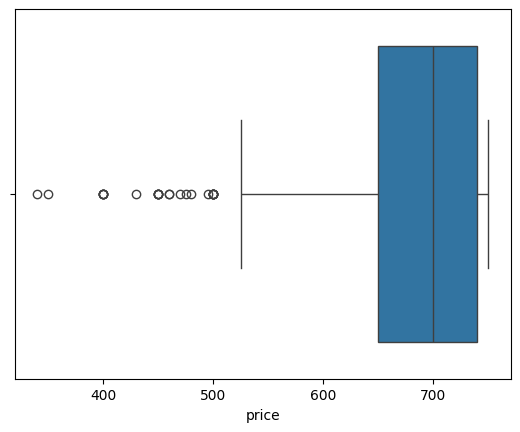

In [221]:
sns.boxplot(df_out_imputed.reset_index(drop = True), x= 'price')

In [222]:
df_out_imputed.to_csv("datos/prepped_data.csv")